# Presentacion del Proyecto Final para el Bootcamp de Ciencia de Datos de Codigofacilito

#### Para la realizacion del proyecto se seleccionaron datos de la plataforma Keggle, especificamente el archivo "All Categories.csv" que se encuentra en este [link](https://www.kaggle.com/shakthidhar/google-play-store-category-wise-top-500-apps?select=All+Categories.csv)

#### Contenido
El archivo contiene las 500 principales apps disponibles en la tienda de aplicaciones de Google (*Google Play Store*) para la categoria "All Categories" que incluye: Art & Design, Auto & Vehicles, Beauty, Books & Reference, Business, Comics, Communication, Education, Entertainment, Events, Finance, Food & Drink, Health & Fitness, House & Home, Libraries & Demo, Lifestyle, Maps & Navigation, Medical, Music & Audio, News & Magazines, Parenting, Personalization, Photography, Productivity, Shopping, Social, Sports, Tools, Travel & Local, and Video Players & Editors.

El ranking de las aplicaciones esta basado en el ranking de la Play Store para Enero 2022.

#### Abreviaciones
En los campos 'Review' y 'Download' se utilizan las abreviaciones T, L, Cr que representan Miles (*Thousands*), Lakhs, y Crores de acuerdo a la convencion de nomenclatura de "Google Play Store Naming Convention".
1L (1 Lakh) = 100T (100 Mil)
10L (10 Lakhs) = 1M (1 Millon)
1Cr( 1 Crore) = 10M (10 Millon)

### Objetivos propuestos para analizar:
1. ¿Hay algun desarrollador que tenga mas aplicaciones en el top 500 en comparacion al resto?
2. ¿Hay algun desarrollador cuyas aplicaciones destaquen en cantidad de descargas?
3. ¿La cantidad de descargas de una aplicacion afecta su puntuacion de estrellas (*a.k.a. Star Rating*)?

## Antes de manipular los datos para obtener conclusiones hacemos un breve analisis de la forma que tienen los datos.

Comenzamos por importar las librerias necesarias para la ejecucion de los comandos siguientes:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# funcion auxiliar para mostrar etiquetas en los graficos de barras 
def show_value_for_barplot(barplot, h_v="v"):
    if h_v == "v":
        for p in barplot.patches:
            barplot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    elif h_v == "h":
        for p in barplot.patches:
            barplot.annotate(format(p.get_width(), '.1f'), (p.get_width(), p.get_y()+ p.get_height() / 2.), ha = 'center', va = 'center', xytext = (30, 0), textcoords = 'offset points')


Cargamos los datos entregados del archivo "All_Categories.csv" que se pueden descargar del repositorio [LINK](WWW.google.com).
El archivo mencionado contiene datos de las 500 principales aplicaciones de Google Playstore basandose en el ranking actualizado a Enero 2022 para todas las categorias.

In [2]:
datos = pd.read_csv('datos/All_Categories.csv')

Para poder hacernos una idea de la forma de los datos con los que trabajaremos se desea saber la cantidad de columnas
(*'campos'*) y registros que contiene el archivo. Adicionalmente se muestra una vista previa de lo que contiene el archivo.

In [3]:
datos.shape

(600, 9)

In [4]:
datos.head()

,Rank,Name,Developer,Category,Size,Star Rating,Reviews,Downloads,Rated for
0,1,Meesho: Online Shopping App,Meesho,Shopping,15 MB,4.4,15L,10Cr+,3+
1,2,Shopee: Online Shopping,Shopee,Shopping,68 MB,4.1,76T,1Cr+,3+
2,3,Instagram,Instagram,Social,41 MB,4.3,13Cr,100Cr+,12+
3,4,"MX Player: Videos, OTT & Games",MX Media (formerly J2 Interactive),Video Players & Editors,36 MB,4.1,1Cr,100Cr+,3+
4,5,speedfiy,PRIME DIGITAL PTE. LTD.,Tools,12 MB,4.5,41T,1Cr+,3+


## Ahora que tenemos una nocion basica de la forma de nuestros datos procedemos a dar el formato correcto a cada campo, dar disposicion a valores NaN, etc. (*limpiar los datos*)

Para esto queremos saber si hay valores 'NaN' en nuestros datos y cuantos de ellos, esto lo podemos saber ejecutando el siguiente codigo,

In [5]:
datos.isnull().values.any()

True

In [6]:
datos[datos.isnull().any(1)]

,Rank,Name,Developer,Category,Size,Star Rating,Reviews,Downloads,Rated for
236,237,"EasyShare – Ultrafast File Transfer, Free & No...",Vivo Communication Technology Co. Ltd,Tools,13 MB,NaN,NaN,10Cr+,3+


Del anterior analisis observamos que solo tenemos una fila con valores NaN, por lo que se opta por eliminar dicho registro.

In [7]:
data = datos.dropna(how='any')
data

,Rank,Name,Developer,Category,Size,Star Rating,Reviews,Downloads,Rated for
0,1,Meesho: Online Shopping App,Meesho,Shopping,15 MB,4.4,15L,10Cr+,3+
1,2,Shopee: Online Shopping,Shopee,Shopping,68 MB,4.1,76T,1Cr+,3+
2,3,Instagram,Instagram,Social,41 MB,4.3,13Cr,100Cr+,12+
3,4,"MX Player: Videos, OTT & Games",MX Media (formerly J2 Interactive),Video Players & Editors,36 MB,4.1,1Cr,100Cr+,3+
4,5,speedfiy,PRIME DIGITAL PTE. LTD.,Tools,12 MB,4.5,41T,1Cr+,3+
...,...,...,...,...,...,...,...,...,...
595,596,Cutie SMS,Info Jod,Entertainment,9.9 MB,4.9,6T,1L+,3+
596,597,MV Master - MV Master video maker,MV Master - MV Master video maker,Video Players & Editors,43 MB,3.6,30T,1Cr+,3+
597,598,Amazon Pay For Business,Amazon Mobile LLC,Business,24 MB,4.3,15T,10L+,3+
598,599,Music Player - MP3 Player,Apps10X,Music & Audio,9.4 MB,4.6,14L,5Cr+,3+


Lo siguiente es transformar los valores de 'Review' y 'Downloads' a numeros enteros ya que seran mas utiles en ese formato a la hora de realizar distintos analisis.

Primero comenzamos con los datos de 'Reviews':

In [8]:
data.Reviews.unique()

array(['15L', '76T', '13Cr', '1Cr', '41T', '2Cr', '34L', '4L', '2L',
       '20L', '77L', '12Cr', '69L', '45L', '32L', '15Cr', '46T', '7L',
       '14L', '1L', '71L', '35L', '6L', '12L', '10L', '16L', '57L', '5T',
       '30L', '38L', '5L', '79L', '3T', '11L', '50T', '8L', '81T', '23T',
       '55T', '87T', '22T', '25T', '3L', '47L', '28L', '8Cr', '13L',
       '52T', '23L', '60L', '32T', '53L', '4T', '7T', '25L', '21L', '9L',
       '24T', '1T', '70T', '36L', '65T', '29L', '77T', '66L', '92T',
       '21T', '17L', '19L', '80T', '57T', '928', '73L', '20T', '82L',
       '27L', '8T', '62T', '18L', '2T', '30T', '35T', '95L', '75T', '87L',
       '531', '31T', '13T', '84T', '64T', '687', '18T', '68T', '71T',
       '54T', '9T', '22L', '85T', '41L', '4Cr', '39T', '15T', '36T',
       '49L', '53T', '99T', '370', '59L', '34T', '58T', '33T', '326',
       '514', '10T', '56T', '48T', '30', '24L', '68L', '27T', '94L',
       '40L', '29T', '60T', '6T', '40T', '48L', '65L', '547', '925',
       '

In [9]:
ListaNumerosReview = [] # Columna auxiliar de numeros en formato string
ListaAbreviacionesReview = [] # Columna auxiliar de abreviaciones

for value in data.Reviews: #Ciclo para extraer de cada valor su unidad de medicion a fin de convertirla en un numero.
    if value.endswith('T') == True: 
        ListaNumerosReview.append(value[0:-1])
        ListaAbreviacionesReview.append(value[-1])
    elif value.endswith('L') == True:
        ListaNumerosReview.append(value[0:-1])
        ListaAbreviacionesReview.append(value[-1])
    elif value.endswith('Cr') == True:
        ListaNumerosReview.append(value[0:-2])
        ListaAbreviacionesReview.append(value[-2:])
    else:
        ListaNumerosReview.append(value) #Solo es necesario a fin de abarcar todos los casos posibles conocidos
        ListaAbreviacionesReview.append('') #Solo es necesario a fin de abarcar todos los casos posibles conocidos

In [10]:
ReviewsStrToNum = []

for value in ListaAbreviacionesReview: #Ciclo de conversion de unidades, requiere la ejecucion del codigo de la celda anterior.
    if value == 'T': 
        ReviewsStrToNum.append(1000)
    elif value == 'L':
        ReviewsStrToNum.append(100000)
    elif value == 'Cr':
        ReviewsStrToNum.append(10000000)
    else:
        ReviewsStrToNum.append(1)

In [11]:
ReviewsNumAux = map(int, ListaNumerosReview)
ReviewsListNumeros = list(ReviewsNumAux) #Convierte en una lista los valores de enteros de la linea anterior.
ReviewsNumTotal = np.array(ReviewsListNumeros) * np.array(ReviewsStrToNum) #Calculo del valor total considerando su unidad y valor nominal.

In [12]:
data['ReviewsCantidadTotal'] = ReviewsNumTotal
data

C:\Users\mollo\AppData\Local\Temp\ipykernel_23328\2392232099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ReviewsCantidadTotal'] = ReviewsNumTotal


,Rank,Name,Developer,Category,Size,Star Rating,Reviews,Downloads,Rated for,ReviewsCantidadTotal
0,1,Meesho: Online Shopping App,Meesho,Shopping,15 MB,4.4,15L,10Cr+,3+,1500000
1,2,Shopee: Online Shopping,Shopee,Shopping,68 MB,4.1,76T,1Cr+,3+,76000
2,3,Instagram,Instagram,Social,41 MB,4.3,13Cr,100Cr+,12+,130000000
3,4,"MX Player: Videos, OTT & Games",MX Media (formerly J2 Interactive),Video Players & Editors,36 MB,4.1,1Cr,100Cr+,3+,10000000
4,5,speedfiy,PRIME DIGITAL PTE. LTD.,Tools,12 MB,4.5,41T,1Cr+,3+,41000
...,...,...,...,...,...,...,...,...,...,...
595,596,Cutie SMS,Info Jod,Entertainment,9.9 MB,4.9,6T,1L+,3+,6000
596,597,MV Master - MV Master video maker,MV Master - MV Master video maker,Video Players & Editors,43 MB,3.6,30T,1Cr+,3+,30000
597,598,Amazon Pay For Business,Amazon Mobile LLC,Business,24 MB,4.3,15T,10L+,3+,15000
598,599,Music Player - MP3 Player,Apps10X,Music & Audio,9.4 MB,4.6,14L,5Cr+,3+,1400000


Luego, una vez agregados los datos de 'Reviews' transformados a numeros enteros, continuamos con el mismo proceso para los valores de 'Downloads':

In [13]:
data.Downloads.unique()

array(['10Cr+', '1Cr+', '100Cr+', '50Cr+', '5Cr+', '500Cr+', '50L+',
       '10L+', '1L+', '5L+', '1TCr+', '50T+', '10T+'], dtype=object)

In [14]:
ListaNumerosDownloads = []
ListaAbreviacionesDownloads = []

for value in data.Downloads:
    if value.endswith('T+') == True: 
        ListaNumerosDownloads.append(value[0:-2])
        ListaAbreviacionesDownloads.append(value[-2:])
    elif value.endswith('L+') == True:
        ListaNumerosDownloads.append(value[0:-2])
        ListaAbreviacionesDownloads.append(value[-2:])
    elif value.endswith('TCr+') == True:
        ListaNumerosDownloads.append(value[0:-4])
        ListaAbreviacionesDownloads.append(value[-4:])
    else:  #Cr+
        ListaNumerosDownloads.append(value[0:-3])
        ListaAbreviacionesDownloads.append(value[-3:])

In [15]:
ListaDownloadsStrToNum = []

for value in ListaAbreviacionesDownloads:
    if value == 'T+': 
        ListaDownloadsStrToNum.append(1000)
    elif value == 'L+':
        ListaDownloadsStrToNum.append(100000)
    elif value == 'TCr+':
        ListaDownloadsStrToNum.append(10000000000)
    else:   #Cr+
        ListaDownloadsStrToNum.append(10000000)

In [16]:
DonwloadsNumAux = map(int, ListaNumerosDownloads)
DownloadsListNumeros = list(DonwloadsNumAux) #Convierte en una lista los valores de enteros de la linea anterior.
DownloadsNumTotal = np.array(DownloadsListNumeros) * np.array(ListaDownloadsStrToNum) #Calculo del valor total considerando su unidad y valor nominal.

In [17]:
data['DownloadsCantidadTotal'] = DownloadsNumTotal
data

C:\Users\mollo\AppData\Local\Temp\ipykernel_23328\4192385908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DownloadsCantidadTotal'] = DownloadsNumTotal


,Rank,Name,Developer,Category,Size,Star Rating,Reviews,Downloads,Rated for,ReviewsCantidadTotal,DownloadsCantidadTotal
0,1,Meesho: Online Shopping App,Meesho,Shopping,15 MB,4.4,15L,10Cr+,3+,1500000,100000000
1,2,Shopee: Online Shopping,Shopee,Shopping,68 MB,4.1,76T,1Cr+,3+,76000,10000000
2,3,Instagram,Instagram,Social,41 MB,4.3,13Cr,100Cr+,12+,130000000,1000000000
3,4,"MX Player: Videos, OTT & Games",MX Media (formerly J2 Interactive),Video Players & Editors,36 MB,4.1,1Cr,100Cr+,3+,10000000,1000000000
4,5,speedfiy,PRIME DIGITAL PTE. LTD.,Tools,12 MB,4.5,41T,1Cr+,3+,41000,10000000
...,...,...,...,...,...,...,...,...,...,...,...
595,596,Cutie SMS,Info Jod,Entertainment,9.9 MB,4.9,6T,1L+,3+,6000,100000
596,597,MV Master - MV Master video maker,MV Master - MV Master video maker,Video Players & Editors,43 MB,3.6,30T,1Cr+,3+,30000,10000000
597,598,Amazon Pay For Business,Amazon Mobile LLC,Business,24 MB,4.3,15T,10L+,3+,15000,1000000
598,599,Music Player - MP3 Player,Apps10X,Music & Audio,9.4 MB,4.6,14L,5Cr+,3+,1400000,50000000


## Visualizacion general de los Datos y sus interrelaciones

### Analisis de comportamiento individual de variables

En primer lugar analizaremos las frecuencias de distintas variables a fin de identificar si existen patrones visualmente identificables.

Primero queremos saber cuantos desarrolladores tenemos registrados,

In [18]:
data['Developer'].unique().size

491

Lo siguiente es saber que cantidad de aplicaciones tiene cada desarrollador dentro de las 500 mas populares.
Esto lo haremos con un grafico de barras, pero de acuerdo al resultado anterior esto no sería facil de visualizar, por lo que nos limitaremos a ver el top 20 de desarrolladores por cantidad de aplicaciones. 

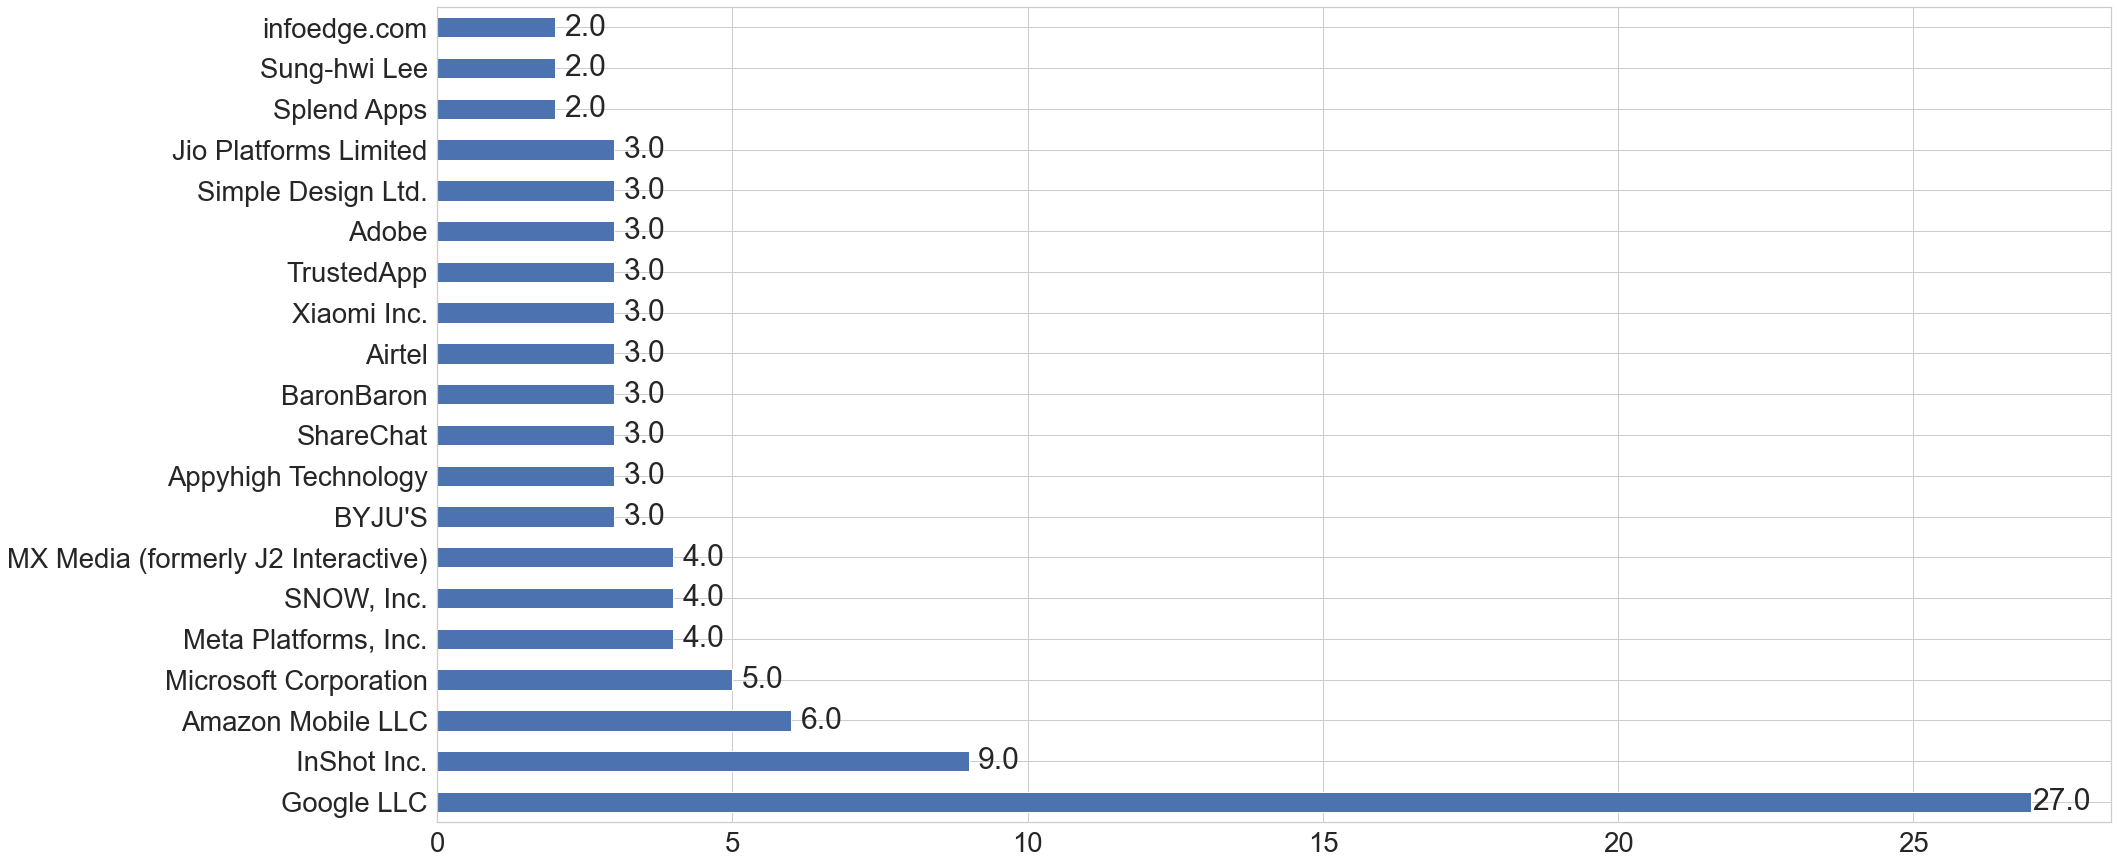

In [52]:
sns.set(style='whitegrid', font_scale=2.5, rc = {'figure.figsize':(30,15)})
graficoBarra1 = data['Developer'].value_counts()[:20].plot(kind='barh')
show_value_for_barplot(graficoBarra1,h_v="h")
# graficoBarra = data['Developer'].value_counts()[:5].plot(kind='barh')


Ahora veremos de manera similar la cantidad de aplicaciones por Categoria, en este caso no es necesario limitar la cantidad de registros a mostrar.

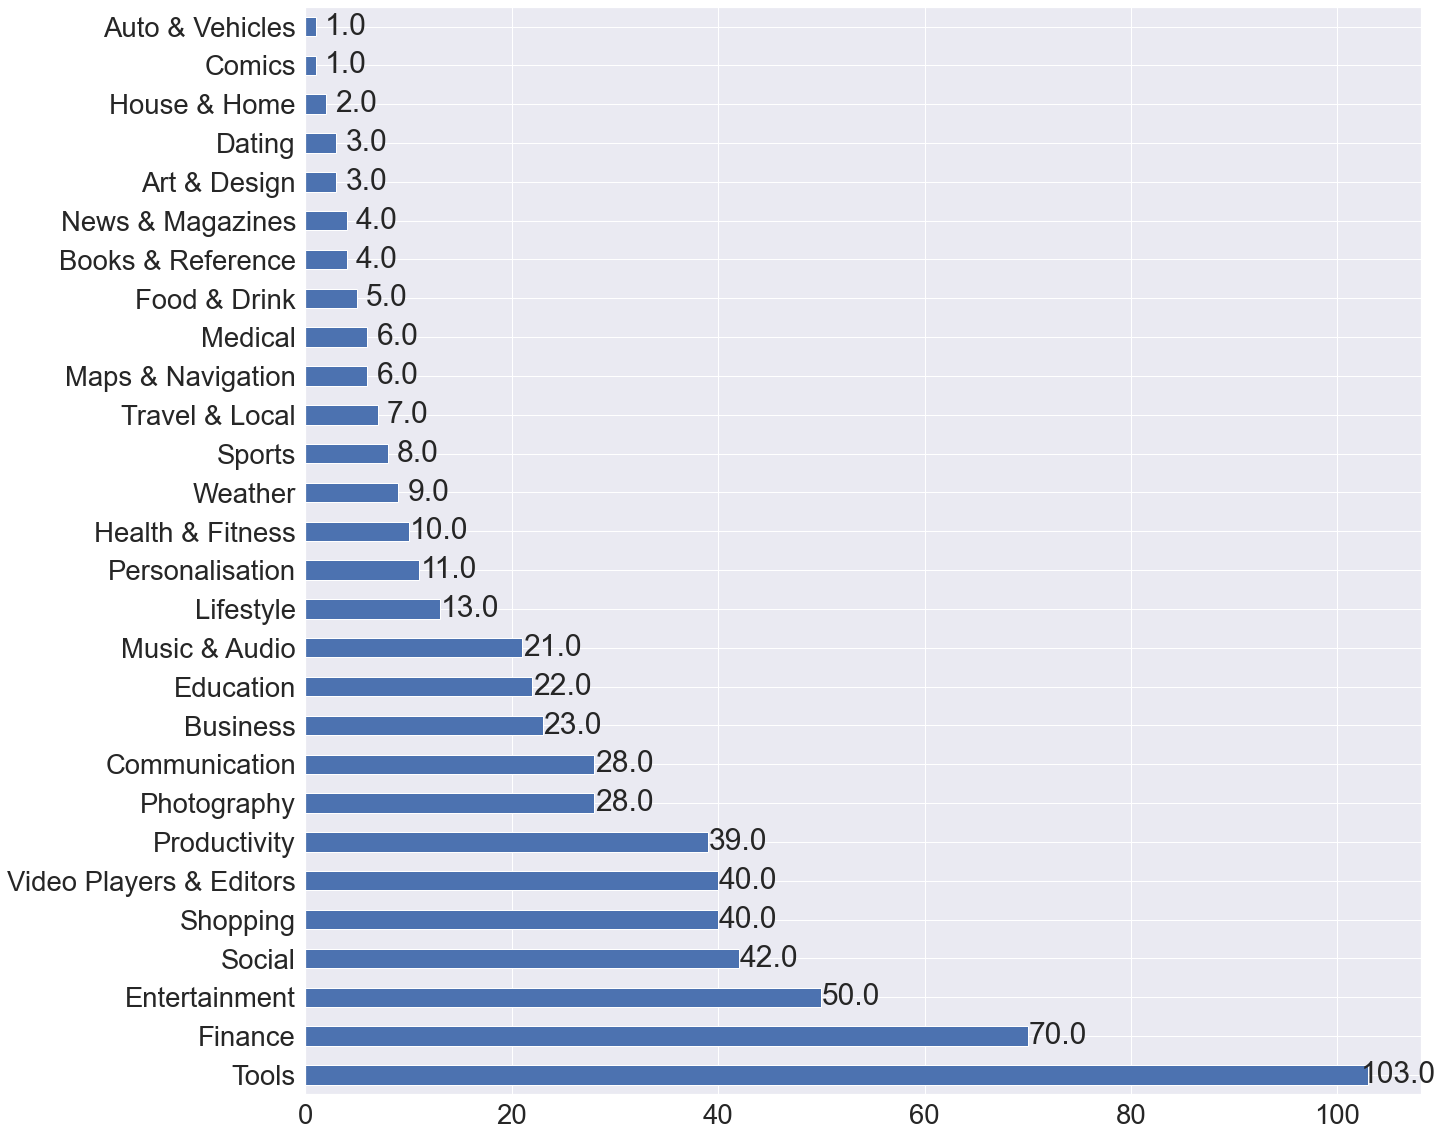

In [20]:
sns.set( font_scale=2.5, rc = {'figure.figsize':(20,20)})
graficoBarra2 = data['Category'].value_counts().plot(kind='barh')
show_value_for_barplot(graficoBarra2,h_v="h")

A continuacion podremos ver la distribucion de descargas de los 5 principales desarrolladores:

In [21]:
top5Developer = data.groupby('Developer',as_index=False).count() #Primero obtenemos un subconjunto con los desarrolladores top
#top5Developer = pd.DataFrame(data['Developer'].value_counts().head())
top5Developer = top5Developer.sort_values('Rank', ascending=False)
top5 = top5Developer.rename(columns={'Rank':'CantApps'})
top5Developers = np.array(top5[(top5['CantApps'] >3)]['Developer'])
top5_ = top5[(top5['CantApps'] >3)]
top5_[['Developer','CantApps']]

,Developer,CantApps
143,Google LLC,27
161,InShot Inc.,9
13,Amazon Mobile LLC,6
233,Microsoft Corporation,5
222,MX Media (formerly J2 Interactive),4
232,"Meta Platforms, Inc.",4
323,"SNOW, Inc.",4


C:\Users\mollo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


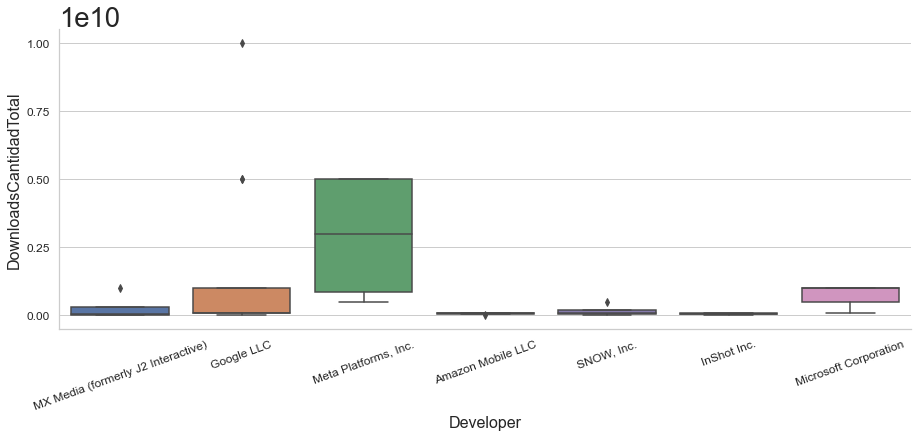

In [57]:
graficoCaja1 = data[data.Developer.isin(top5Developers)]
graficoCaja1 = graficoCaja1[['Developer','DownloadsCantidadTotal']]
sns.catplot(kind="box", x="Developer", y="DownloadsCantidadTotal", data = graficoCaja1)
plt.gca().xaxis.label.set_size(16)
plt.gca().yaxis.label.set_size(16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xticks(rotation=20)
plt.gcf().set_size_inches(20, 6)

De este grafico podemos concluir que el top 5 de desarrolladores (por cantidad de apps) se puede dividir en dos subgrupos, estos son por un lado un grupo al que podemos llamar de "pocas" descargas y otro de "muchas" descargas.
El segundo es un poco mas interesante, el mismo esta formado por Google y Meta, y aqui vemos que "Meta Patforms Inc." tiene consecuenteme muchas descargas, esto se observa en su mediana la cual es mayor que los valores maximos de todos los demas a excepcion de "Google LLC", este ultimo tiene un comportamiento parecido a los integrantes del primer grupo con la salvedad de que posee dos valores que se escapan de este comportamiento, incluso superando ampliamente los maximos de su compañero de grupo.

A continuacion veremos las principales aplicaciones de "Google LLC" por cantidad de descargas totales.

In [23]:
AppsByGoogle = data[data['Developer']=="Google LLC"]
AppsByGoogle.sort_values(["DownloadsCantidadTotal"], ascending = False).head()

,Rank,Name,Developer,Category,Size,Star Rating,Reviews,Downloads,Rated for,ReviewsCantidadTotal,DownloadsCantidadTotal
331,332,YouTube,Google LLC,Video Players & Editors,37 MB,4.1,13Cr,1TCr+,12+,130000000,10000000000
397,398,Google Drive,Google LLC,Productivity,784 KB,4.2,87L,500Cr+,3+,8700000,5000000000
223,224,Google Photos,Google LLC,Photography,36 MB,4.4,4Cr,500Cr+,3+,40000000,5000000000
76,77,Files by Google,Google LLC,Tools,6.2 MB,4.4,53L,100Cr+,3+,5300000,1000000000
85,86,Google Play Games,Google LLC,Entertainment,10 MB,4.3,1Cr,100Cr+,12+,10000000,1000000000


Otra realcion interesante de poder visualizar es la de Star Rating y Descargas totales, para ello utilizaremos un grafico del tipo Regresion Linear:

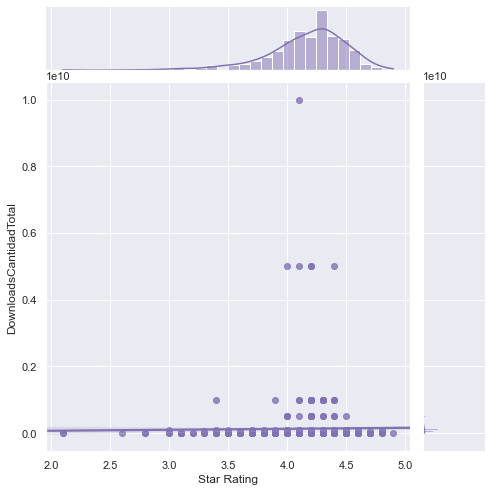

In [51]:
sns.set_theme(style="darkgrid")

RelacionDescargasReviews = sns.jointplot(x="Star Rating", y="DownloadsCantidadTotal", data=data,
                  kind="reg", truncate=False,
                 # xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

En el grafico anterior podemos ver un cluster de datos claramente alejado de los valores mas grandes, por ello repetiremos el grafico pero limitando los datos a DownloadsCantidadTotal < 10.000.000

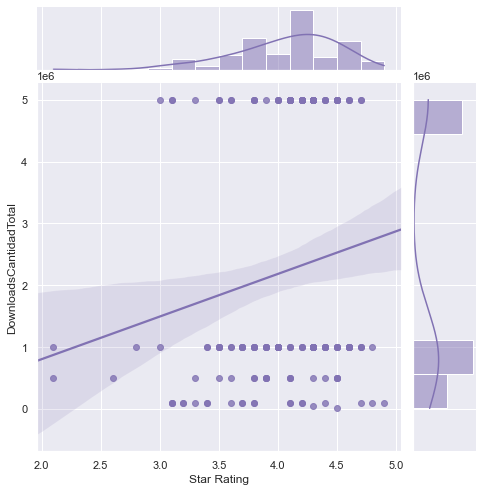

In [50]:
sns.set_theme(style="darkgrid")

datafiltered = data[data['DownloadsCantidadTotal']<10000000]

RelacionDescargasReviews = sns.jointplot(x="Star Rating", y="DownloadsCantidadTotal", data=datafiltered,
                  kind="reg", truncate=False,
                 # xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)


De ambos graficos podemos concluir que no hay una relacion estricta entre ambas variables, es decir, podemos concluir que la cantidad de descargas de una aplicacion no influenciara su calificacion de estrellas (Star Rating).